In [12]:
%matplotlib inline
import csv
from matplotlib import pyplot as plt
import numpy as np

In [27]:
evaluations = {}
file_names = ["evaluation_cc-based overall_19-11-2016_19-57",
              "evaluation_ig-based_19-11-2016_20-02",
              "evaluation_ig-based-non-uniform_19-11-2016_20-12",
              "evaluation_most-common_19-11-2016_19-55",
              "evaluation_xi-square_19-11-2016_20-08",
              "evaluation_xi-square-based overall_19-11-2016_19-57",
             ]
for file_name in file_names:
    evaluations_file = open("vacabulary_test_results/"+file_name+".csv", "r")
    evaluations_reader = csv.reader(evaluations_file)
    col_names = next(evaluations_reader)
    for row in evaluations_reader:
        if not (row[0] in evaluations.keys()): evaluations[row[0]] = []
        evaluations[row[0]] += [{c: r for c, r in zip(col_names[1:], row[1:])}]

In [29]:
evaluations.keys()

dict_keys(['cc-based overall', 'ig-based', 'ig-based-non-uniform', 'xi-square', 'most-common', 'xi-square-based overall'])

In [31]:
for e in evaluations["ig-based-non-uniform"]:
    print(e["arguments"], e["term-space-dimension"])

{'read_from_file': True, 'M': 1} 9
{'read_from_file': True, 'M': 500} 306
{'read_from_file': True, 'M': 1000} 608
{'read_from_file': True, 'M': 2000} 1233
{'read_from_file': True, 'M': 3000} 1926
{'read_from_file': True, 'M': 4000} 2430
{'read_from_file': True, 'M': 5000} 3033
{'read_from_file': True, 'M': 8000} 5777


In [15]:
x, y, z, w = {}, {}, {}, {}
for key in evaluations.keys():
    x[key] = [ int(e["term-space-dimension"]) for e in evaluations[key] ]
    y[key] = [ float(e["microavaraged_recall"]) for e in evaluations[key] ]
    z[key] = [ float(e["macroavaraged_recall"]) for e in evaluations[key] ]
    w[key] = [ float(e["macroavarged_precission"]) for e in evaluations[key] ]

In [16]:
len(x["most-common"]), len(y["most-common"])

(9, 9)

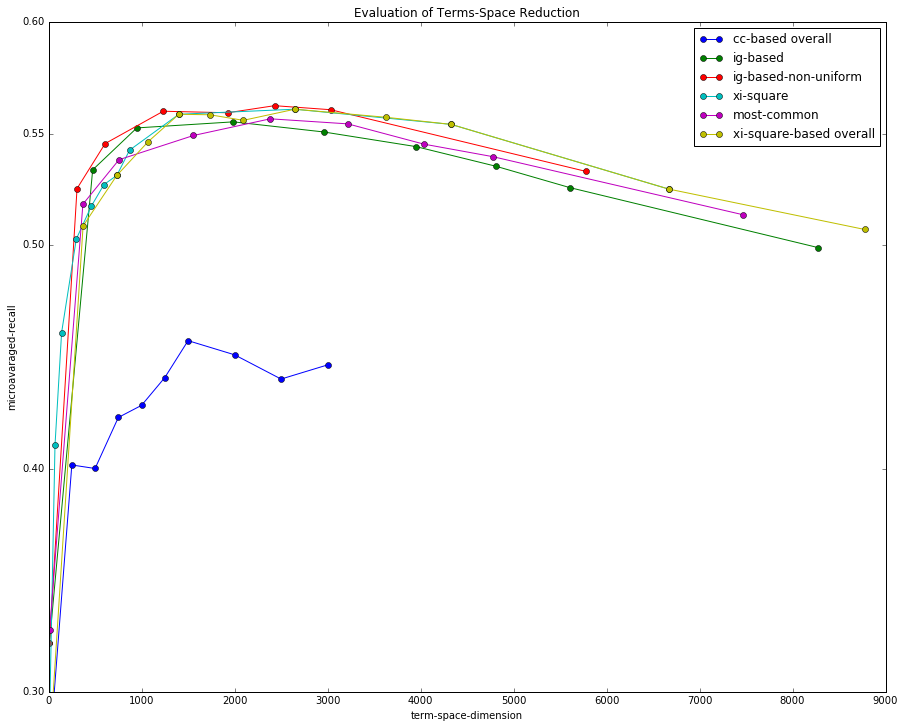

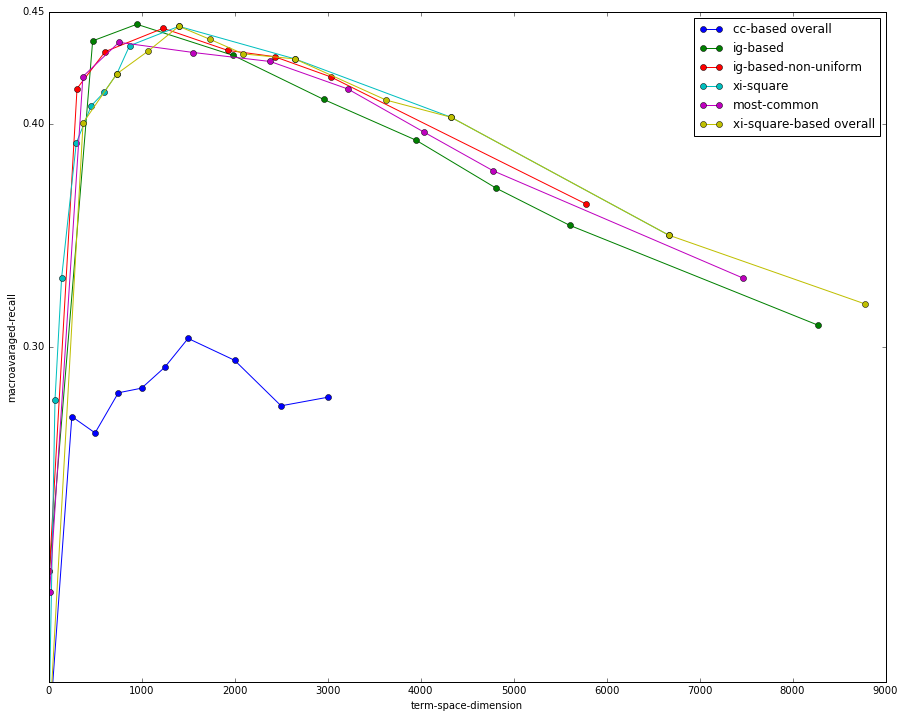

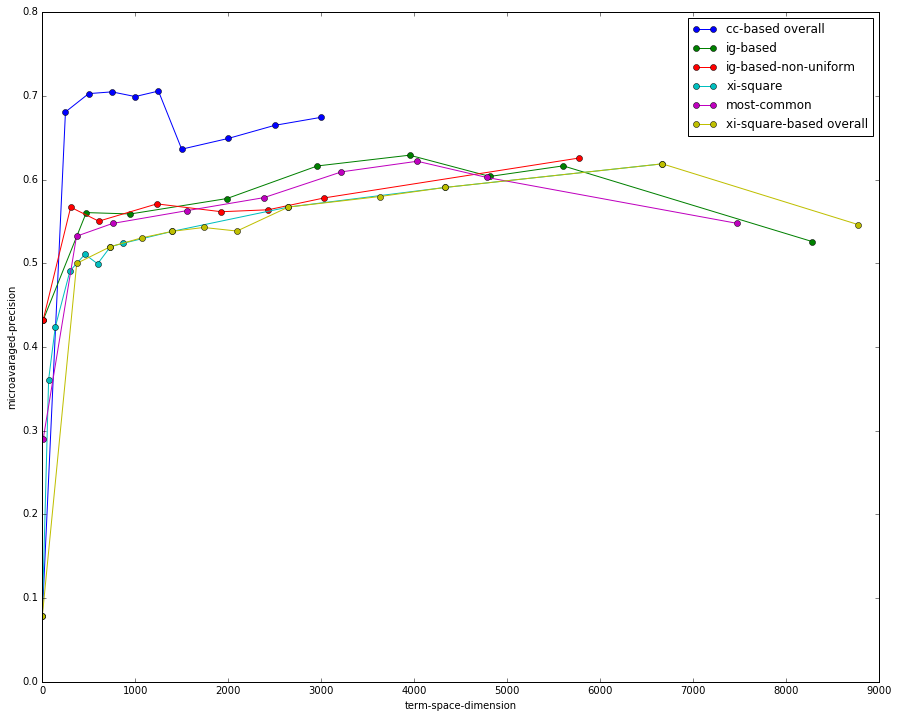

In [22]:
fig = plt.figure()
fig.set_size_inches(15,12)

fig2 = plt.figure()
fig2.set_size_inches(15,12)

fig3 = plt.figure()
fig3.set_size_inches(15,12)

ax_mi_re = fig.add_subplot(111)
ax_ma_re = fig2.add_subplot(111)
ax_ma_pr = fig3.add_subplot(111)

ax_mi_re.set_ylim((0.3, 0.6))
ax_ma_re.set_ylim((0.15, 0.45))

for key in list(evaluations.keys()):
    ax_mi_re.plot(x[key],y[key],"o-", label=key)
    ax_ma_re.plot(x[key],z[key],"o-", label=key)
    ax_ma_pr.plot(x[key],w[key],"o-", label=key)

ax_mi_re.set_title("Evaluation of Terms-Space Reduction")

ax_mi_re.set_xlabel("term-space-dimension")
ax_mi_re.set_ylabel("microavaraged-recall")

ax_ma_re.set_xlabel("term-space-dimension")
ax_ma_re.set_ylabel("macroavaraged-recall")

ax_ma_pr.set_xlabel("term-space-dimension")
ax_ma_pr.set_ylabel("microavaraged-precision")

ax_mi_re.set_yticks((0.3,0.4,0.5,0.55,0.6))
ax_ma_re.set_yticks((0.3,0.4,0.45))

ax_mi_re.legend()
ax_ma_re.legend()
ax_ma_pr.legend()

In [2]:
import pickle
corpus = pickle.load(open("corpus.pkl", "rb"))

In [4]:
corpus.cats.frequencies.freq("wissen")/14

0.011198086540552293

In [7]:
(2*30/45)/3

0.4444444444444444

1/14

In [8]:
1/14

0.07142857142857142

In [10]:
corpus.frequencies["all"].N()

43848